# **1. Install Library**

In [97]:
# ! pip install mlxtend==0.21.0

In [98]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value=100
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [99]:
# from google.colab import drive
# drive.mount('/content/drive')

In [100]:
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

# **2. Read Data**

## 2.1 unrar

In [101]:
# ! unrar x drive/MyDrive/Data_FastRNN.rar

## 2.2 read data main

In [102]:
import pandas as pd
data_main=pd.read_excel("data_fastrnn1.xlsx",header=[1],sheet_name='ختوقا')
data_main

,نماد,firm,date,تاریخ شمسی,داده ها از 90 تا 1400,اولين قيمت,بالاترين قيمت,كمترين قيمت,قيمت پاياني,ارزش معاملات,...,dps,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار
0,Iran.Auto-Parts,4,2011/03/26,1390/01/06,6672,2595,2631,2595,2630,1051614850,...,400,120,162.115500,0.099039,8.211562,23756.3,21.752513,1.156180e+05,123.949161,10384
1,Iran.Auto-Parts,4,2011/03/27,1390/01/07,6673,2700,2729,2525,2677,1439415015,...,400,120,162.115500,0.099039,8.211562,24199.8,21.825323,1.106293e+05,125.070955,10384
2,Iran.Auto-Parts,4,2011/03/28,1390/01/08,6674,2575,2670,2575,2674,32242074,...,400,120,162.115500,0.099039,8.211562,24287.8,21.897961,1.056489e+05,125.446358,10392
3,Iran.Auto-Parts,4,2011/03/29,1390/01/09,6675,2676,2676,2600,2664,156340657,...,400,120,162.115500,0.099039,8.211562,24486.6,21.970427,1.006767e+05,125.822496,10394
4,Iran.Auto-Parts,4,2011/03/30,1390/01/10,6676,2664,2770,2620,2738,1331351333,...,400,120,162.115500,0.099039,8.211562,24486.0,22.042720,9.571276e+04,126.199369,10400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,Iran.Auto-Parts,4,2022/03/13,1400/12/22,9029,2152,2233,2135,2185,43675369595,...,16,154,57.987013,0.119028,6.904775,1335376.4,30.096101,1.167731e+07,122.833988,42000
2358,Iran.Auto-Parts,4,2022/03/14,1400/12/23,9030,2200,2293,2182,2261,38390288369,...,16,154,57.987013,0.119028,6.904775,1334776.9,29.929022,1.167140e+07,123.204977,42000
2359,Iran.Auto-Parts,4,2022/03/15,1400/12/24,9031,2230,2349,2230,2315,59633659203,...,16,154,57.987013,0.119028,6.904775,1337223.2,29.761546,1.166546e+07,123.576701,42000
2360,Iran.Auto-Parts,4,2022/03/16,1400/12/25,9032,2374,2430,2374,2428,121349131191,...,16,154,57.987013,0.119028,6.904775,1345018.2,29.593672,1.165950e+07,123.949161,42000


# **3. Preproceesing Data**

In [103]:
data_main.isna().sum()

نماد                      0
firm                      0
date                      0
تاریخ شمسی                0
داده ها از 90 تا 1400     0
اولين قيمت                0
بالاترين قيمت             0
كمترين قيمت               0
قيمت پاياني               0
ارزش معاملات              0
حجم معاملات               0
قيمت پيش گشايش            0
قيمت اولي                 0
آخرين قيمت                0
MA(5)                     4
MA(12)                   11
MA(26)                   25
EMA(12)                   0
EMA(26)                   0
MACD                     25
RSI                      14
dps                       0
eps                       0
p_e                       0
roa                       0
size                      0
شاخص کل                   1
تورم                      0
طلا                       0
نفت                       0
دلار                      0
dtype: int64

In [104]:
data_main_pre=data_main.fillna(0)
data_main_pre['lbl']=data_main_pre['قيمت پاياني']
data_main_pre.drop(['date','نماد','firm','داده ها از 90 تا 1400','تاریخ شمسی','قيمت اولي'],axis=1,inplace=True)
data_main_pre.drop('قيمت پاياني',axis=1,inplace=True)
data_main_pre

,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
0,2595,2631,2595,1051614850,399850,31,2631,0.0,0.000000,0.000000,...,120,162.115500,0.099039,8.211562,23756.3,21.752513,1.156180e+05,123.949161,10384,2630
1,2700,2729,2525,1439415015,537692,65,2525,0.0,0.000000,0.000000,...,120,162.115500,0.099039,8.211562,24199.8,21.825323,1.106293e+05,125.070955,10384,2677
2,2575,2670,2575,32242074,12294,6,2670,0.0,0.000000,0.000000,...,120,162.115500,0.099039,8.211562,24287.8,21.897961,1.056489e+05,125.446358,10392,2674
3,2676,2676,2600,156340657,59249,25,2615,0.0,0.000000,0.000000,...,120,162.115500,0.099039,8.211562,24486.6,21.970427,1.006767e+05,125.822496,10394,2664
4,2664,2770,2620,1331351333,486186,50,2620,2612.2,0.000000,0.000000,...,120,162.115500,0.099039,8.211562,24486.0,22.042720,9.571276e+04,126.199369,10400,2738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,2152,2233,2135,43675369595,19990728,1003,2209,2309.6,2317.416667,2356.153846,...,154,57.987013,0.119028,6.904775,1335376.4,30.096101,1.167731e+07,122.833988,42000,2185
2358,2200,2293,2182,38390288369,16981799,836,2253,2286.0,2307.250000,2343.961538,...,154,57.987013,0.119028,6.904775,1334776.9,29.929022,1.167140e+07,123.204977,42000,2261
2359,2230,2349,2230,59633659203,25762873,1085,2290,2276.0,2309.583333,2335.653846,...,154,57.987013,0.119028,6.904775,1337223.2,29.761546,1.166546e+07,123.576701,42000,2315
2360,2374,2430,2374,121349131191,49976949,1161,2430,2284.0,2320.416667,2335.423077,...,154,57.987013,0.119028,6.904775,1345018.2,29.593672,1.165950e+07,123.949161,42000,2428


In [105]:
data_final=data_main_pre

In [106]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
print("Original descriptives:")
display(data_final.describe().round(2))

print("\nMin-Max-scaled descriptives:")
scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()  #
scaler.fit(data_final)
data_scaled = scaler.transform(data_final)
df_scaled = pd.DataFrame(data_scaled, index=data_final.index, columns=data_final.columns)
display(df_scaled.describe().round(2))
data_normal=df_scaled


Original descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2362.00,2362.00,2362.00,2.362000e+03,2.362000e+03,2362.00,2362.00,2362.00,2362.00,2362.00,...,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00
mean,2800.62,2855.41,2743.33,4.923053e+10,1.118406e+07,1069.47,2793.45,2789.18,2781.80,2766.96,...,386.09,56.26,0.12,6.64,341566.50,28.17,3900443.31,69.09,31507.32,2803.34
std,2107.09,2140.48,2060.57,1.603208e+11,2.732425e+07,3180.52,2099.30,2072.63,2038.87,1987.72,...,514.32,52.20,0.08,0.99,509370.23,17.56,4126246.22,30.07,10679.92,2098.91
min,0.00,947.00,932.00,2.532000e+04,1.000000e+01,1.00,932.00,0.00,0.00,0.00,...,32.00,4.83,0.02,5.58,0.00,6.20,1835.90,29.47,10384.00,937.00
25%,1670.00,1700.00,1634.25,6.038922e+08,3.009785e+05,50.00,1667.25,1664.40,1655.92,1664.71,...,114.00,14.63,0.06,5.85,65543.27,12.50,999099.36,49.66,25596.00,1668.25
50%,2277.00,2330.00,2232.00,2.743788e+09,1.402666e+06,200.50,2274.00,2271.10,2245.62,2219.25,...,120.00,35.28,0.10,6.09,80084.30,25.64,1322095.03,57.03,32372.50,2280.00
75%,3100.00,3150.00,3055.75,2.073103e+10,7.417612e+06,765.75,3099.75,3115.70,3121.52,3093.65,...,601.00,84.19,0.24,8.21,261291.62,39.02,5598742.31,75.04,42000.00,3120.00
max,22897.00,22897.00,22897.00,1.866101e+12,3.846105e+08,43232.00,22897.00,20822.20,18043.00,15019.38,...,1674.00,162.12,0.28,8.21,2078546.80,65.10,12334149.58,181.46,44120.00,22897.00



Min-Max-scaled descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,...,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00
mean,0.12,0.09,0.08,0.03,0.03,0.02,0.08,0.13,0.15,0.18,...,0.22,0.33,0.40,0.40,0.16,0.37,0.32,0.26,0.63,0.08
std,0.09,0.10,0.09,0.09,0.07,0.07,0.10,0.10,0.11,0.13,...,0.31,0.33,0.32,0.38,0.25,0.30,0.33,0.20,0.32,0.10
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.07,0.03,0.03,0.00,0.00,0.00,0.03,0.08,0.09,0.11,...,0.05,0.06,0.16,0.10,0.03,0.11,0.08,0.13,0.45,0.03
50%,0.10,0.06,0.06,0.00,0.00,0.00,0.06,0.11,0.12,0.15,...,0.05,0.19,0.30,0.19,0.04,0.33,0.11,0.18,0.65,0.06
75%,0.14,0.10,0.10,0.01,0.02,0.02,0.10,0.15,0.17,0.21,...,0.35,0.50,0.86,1.00,0.13,0.56,0.45,0.30,0.94,0.10
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [107]:
data_ready = data_normal.copy()
lbl_ready=data_normal.iloc[:,-1]

print("_"*50)
print("data_final shape: {0}".format(data_ready.shape))
print("lbl_final shape: {0}".format(lbl_ready.shape))
print("_"*50)

__________________________________________________
data_final shape: (2362, 25)
lbl_final shape: (2362,)
__________________________________________________


# **4. Visualization Data**

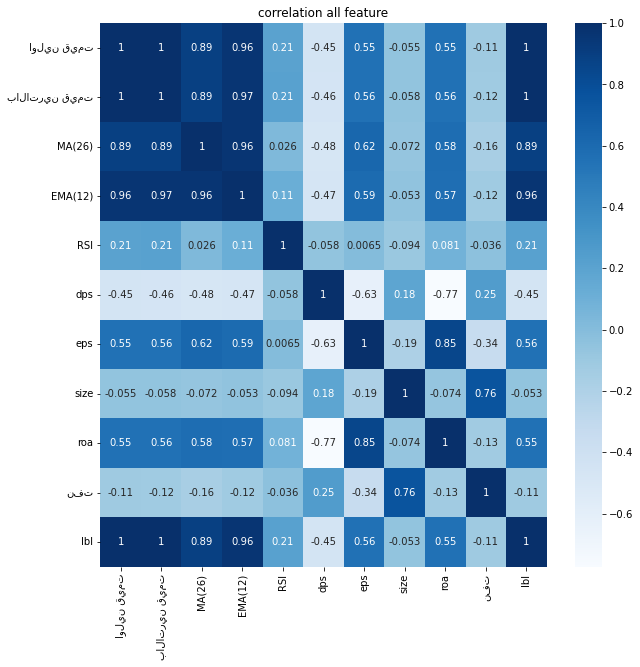

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = data_ready.iloc[:,[0,1,9,10,13,14,15,18,17,22,-1]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.title("correlation all feature")
plt.show()

In [109]:
import numpy as np
col_names=data_ready.columns
cor_abs=np.abs(cor.iloc[:,-1])
idx_sort=np.argsort(cor_abs)
sort_cor=np.round(cor_abs[idx_sort],4)
col_names_new=np.array(col_names)
col_names_sort=col_names_new[idx_sort]
for i, item in  enumerate(col_names_sort):
  print('number: {0} , colums: {1} cor: {2}'.format(i,item,sort_cor[i]))


number: 0 , colums: MA(5) cor: 0.0532
number: 1 , colums: MA(26) cor: 0.1129
number: 2 , colums: حجم معاملات cor: 0.2109
number: 3 , colums: قيمت پيش گشايش cor: 0.4521
number: 4 , colums: MA(12) cor: 0.5539
number: 5 , colums: آخرين قيمت cor: 0.555
number: 6 , colums: كمترين قيمت cor: 0.8894
number: 7 , colums: ارزش معاملات cor: 0.964
number: 8 , colums: اولين قيمت cor: 0.9989
number: 9 , colums: بالاترين قيمت cor: 0.9994
number: 10 , colums: EMA(12) cor: 1.0


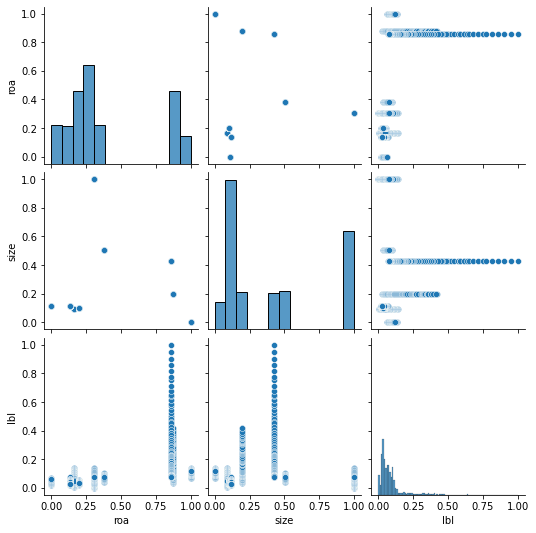

In [110]:
# importing packages
import seaborn
# pairplot with 
seaborn.pairplot(data_ready[['roa','size','lbl']])
# to show
plt.show()

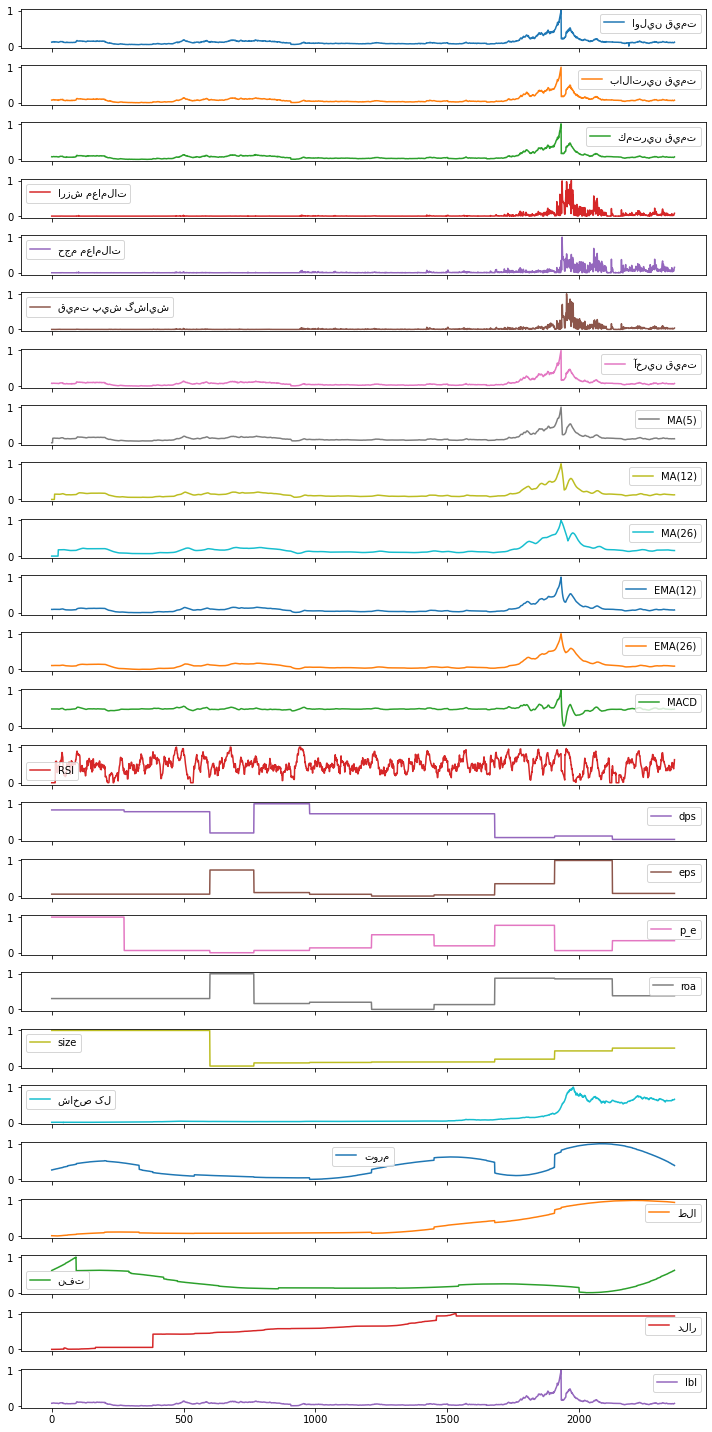

In [111]:
data_ready.plot(subplots=True,figsize=(10,20));
plt.tight_layout(); # <- this is often necessary when using subplots to avoid 

<Figure size 432x288 with 0 Axes>

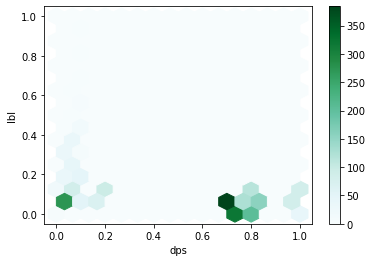

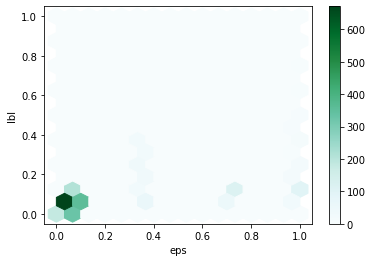

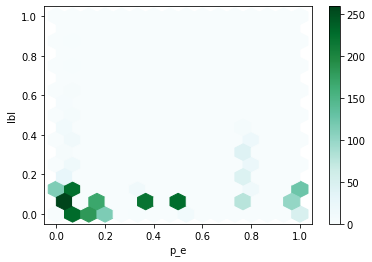

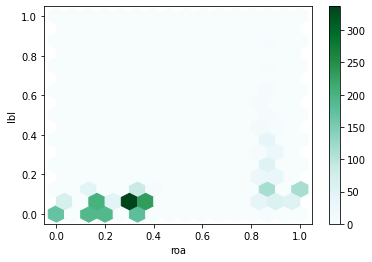

In [112]:
plt.figure()
data_ready.plot(kind="hexbin", x=data_ready.columns[14], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[15], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[16], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[17], y=data_ready.columns[-1], gridsize=15, sharex=False);
plt.show()

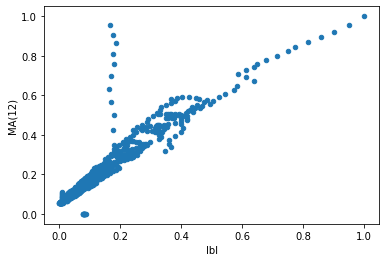

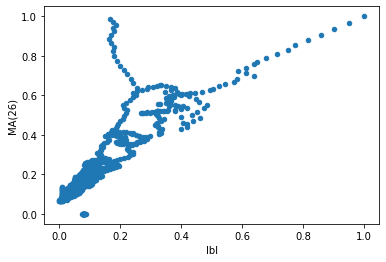

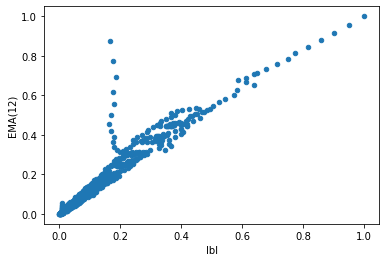

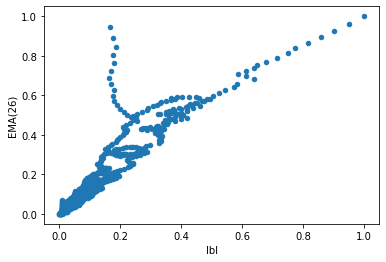

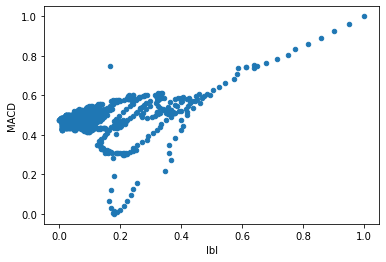

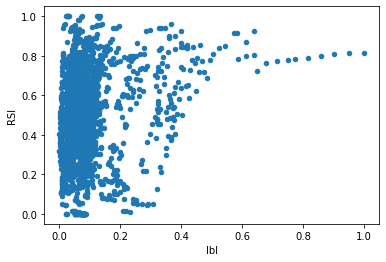

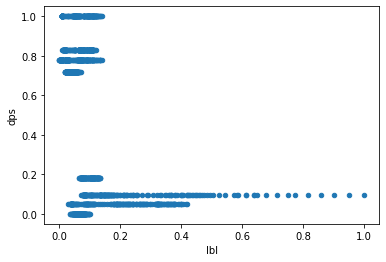

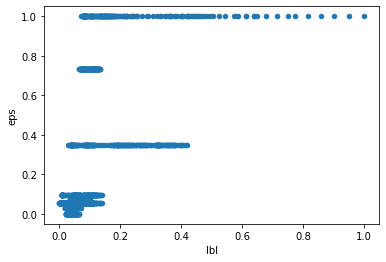

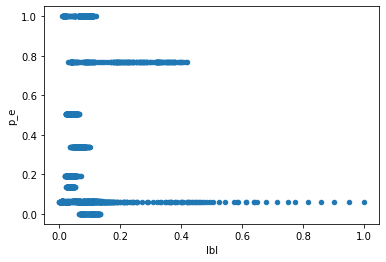

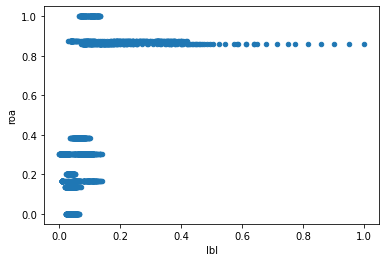

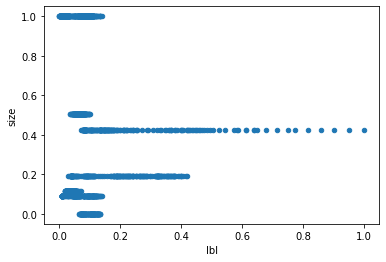

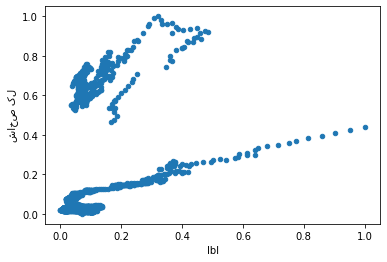

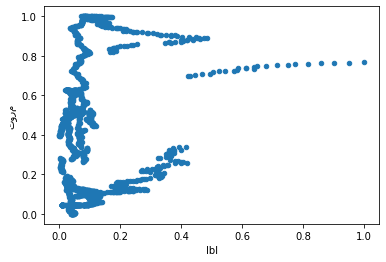

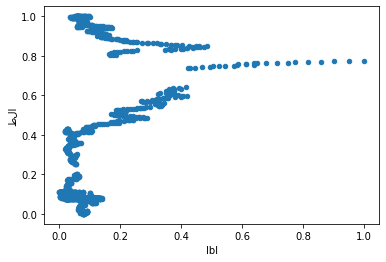

In [113]:
for i in range(8,22):
  data_ready.plot(data_ready.columns[-1], data_ready.columns[i], kind="scatter")

# **5. time window**

In [114]:
data_ready.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'MA(5)', 'MA(12)',
       'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e',
       'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

In [115]:
n_batch=32
feature_input_FastRNN=data_ready.columns.tolist()
feature_out_FastRNN=['lbl']
n_sequence=7

In [116]:
import numpy as np

def multivariate_win(dataset, target, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []
    start_index=0
    end_index = None
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)




In [117]:
STEP =1
n_step=1
past_history = n_sequence
index_precentage = -1

data_can,lbl_candel=multivariate_win(data_ready[feature_input_FastRNN].values,
                                            data_ready[feature_out_FastRNN].values,
                                            past_history,
                                            n_step, STEP,
                                            single_step=True)
print("_"*50)
print('-> data_can  shape = {0}'.format(data_can.shape))
print('-> lbl shape = {0}'.format(lbl_candel.shape))
print("_"*50)


__________________________________________________
-> data_can  shape = (2354, 7, 25)
-> lbl shape = (2354, 1)
__________________________________________________


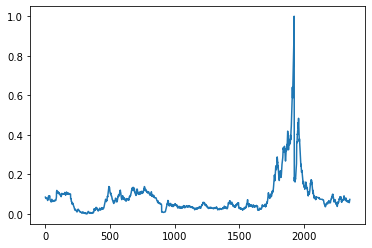

In [118]:
plt.plot(lbl_candel)
plt.show()

# **6. Train test split**

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_can , lbl_candel, test_size=0.10,shuffle=False, random_state=42)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_test.shape, "\n", y_test.shape)

 (2118, 7, 25) 
 (2118, 1) 
 (236, 7, 25) 
 (236, 1)


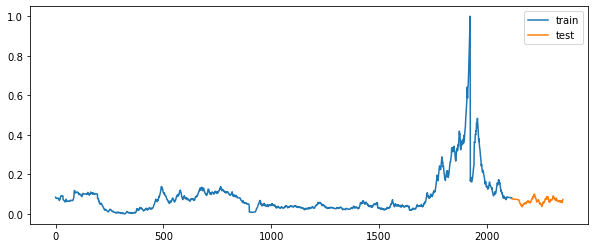

In [125]:
plt.figure(figsize=(10,4))
plt.plot(range(len(y_train)),y_train)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test)
plt.legend(['train','test'])
plt.show()

In [126]:
def fun_pre(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


def plot_pie(values,hlabels,uexplode=[0,0.1],my_color=["red","blue"]):
    plt.pie(values, 
            labels =hlabels,
            explode=uexplode,
            colors=my_color,
            autopct = lambda pct: fun_pre(pct, values))
    plt.legend()
    plt.show() 

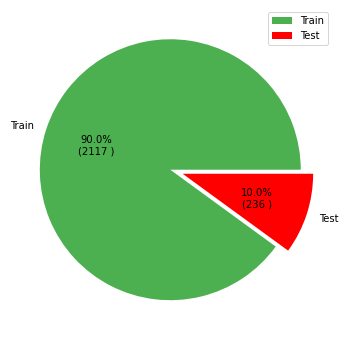

In [127]:
import matplotlib.pyplot as plt
import numpy as np
hlabels=["Train","Test"]
mycolors = [ "#4CAF50","red","blue","#0CFFF0"]

class1=X_train.shape[0]
class2=X_test.shape[0]


values=[class1,class2]
plt.figure(figsize=(6,6))
plt.title("",fontsize=14)
plot_pie(values,hlabels,[0,0.1],mycolors)
plt.show()

# **7.Horse herd optimization algorithm**

In [128]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


## 6.1 base code 

In [129]:
class Particle():
  def __init__(self):
          self.Position=[]
          self.Cost=[]
          self.Velocity=[]
          self.Best=[]

In [130]:
def HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt):

  w=1;
  phiD=0.02;
  phiI=0.02;


  g_Alpha=1.50;       #Grazing
  d_Alpha=0.5;        #Defense Mechanism
  h_Alpha=1.5;        #Hierarchy

  g_Beta=1.50;       # Grazing
  h_Beta=0.9;        #Hierarchy 
  s_Beta=0.20;       #Sociability
  d_Beta=0.20;       #Defense Mechanism

  g_Gamma=1.50;      #Grazing 
  h_Gamma=0.50;      #Hierarchy 
  s_Gamma=0.10;      #Sociability 
  i_Gamma=0.30;      #Imitation
  d_Gamma=0.10;      #Defense Mechanism 
  r_Gamma=0.05;      #Random (Wandering and Curiosity)

  g_Delta=1.50;      #Grazing
  r_Delta=0.10;      #Random (Wandering and Curiosity) 

  # Velocity limits
  VelMax = 0.3 * (VarMax - VarMin)
  VelMin = -VelMax



  Hourse = [Particle() for _ in range(nHourse)]
  GlobalBest=Particle()
  GlobalBest.Cost=np.inf;
  CostPositionCounter=np.zeros((nHourse,2+nVar));


  for i in range(nHourse):
      #Initialize Position
      Hourse[i].Position=np.random.uniform(VarMin, VarMax,VarSize)[0]
      #Initialize Velocity
      Hourse[i].Velocity=np.zeros(VarSize)

      #Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);
      #Update Personal Best
      Hourse[i].Best=deepcopy(Hourse[i])

      #Update Global Best
      if Hourse[i].Best.Cost<GlobalBest.Cost:
          GlobalBest=Hourse[i].Best;  
      ans=[i, Hourse[i].Best.Cost]
      ans.extend(Hourse[i].Best.Position.tolist())
      CostPositionCounter[i,:]=ans;

  BestCost = np.zeros((MaxIt, 1))

  #%%  Main Loop
  for it in range(MaxIt):
    CostPositionCounter=CostPositionCounter[CostPositionCounter[:, 1].argsort()]
    MeanPosition=np.mean(CostPositionCounter[0:nHourse,2:],axis=0);
    BadPosition=np.mean(CostPositionCounter[int((1-phiD)*nHourse):nHourse,2:],axis=0);
    GoodPosition=np.mean(CostPositionCounter[1:int(phiI*nHourse),2:],axis=0);
    for i in range(nHourse):
      CC=np.argwhere(CostPositionCounter[:,0]==i)[0][0]
      # Update Velocity
      if CC<=0.1*nHourse:
        Hourse[i].Velocity = h_Alpha*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        -d_Alpha*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Alpha*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
                
      elif CC<=0.3*nHourse:
        Hourse[i].Velocity = s_Beta*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
            -d_Beta*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
            +h_Beta*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
            +g_Beta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
          
      elif CC<=0.6*nHourse:
        Hourse[i].Velocity = s_Gamma*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
        +r_Gamma*rand(VarSize[1])*(Hourse[i].Position)\
        -d_Gamma*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
        +h_Gamma*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        +i_Gamma*rand(VarSize[1])*(GoodPosition-Hourse[i].Position)\
        +g_Gamma*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);
          
          
      else:
        Hourse[i].Velocity = +r_Delta*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Delta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);

      # Apply Velocity Limits
      Hourse[i].Velocity = np.maximum(Hourse[i].Velocity,VelMin);
      Hourse[i].Velocity = np.minimum(Hourse[i].Velocity,VelMax); 

      # Update Position
      Hourse[i].Position = Hourse[i].Position + Hourse[i].Velocity;
      
      # Velocity Mirror Effect
      IsOutside=(np.less(Hourse[i].Position, VarMin)\
                  | np.greater(Hourse[i].Position, VarMax))
      # IsOutside=IsOutside.reshape(1,-1)    
      Hourse[i].Velocity[IsOutside]=-Hourse[i].Velocity[IsOutside];
      
      # Apply Position Limits
      Hourse[i].Position = np.maximum(Hourse[i].Position,VarMin);
      Hourse[i].Position = np.minimum(Hourse[i].Position,VarMax);

      # Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);  

      # Update Personal Best
      if Hourse[i].Cost<Hourse[i].Best.Cost:
          Hourse[i].Best.Position=Hourse[i].Position;
          Hourse[i].Best.Cost=Hourse[i].Cost;
          # Update Global Best
          if Hourse[i].Best.Cost<GlobalBest.Cost:     
              GlobalBest=deepcopy(Hourse[i].Best);
    BestCost[it] = GlobalBest.Cost
    
    print(' , Iteration = '+ str(it)+\
              ', Best Cost = '+str(np.round(BestCost[it][0],4)))
    
    d_Alpha=d_Alpha*w; g_Alpha=g_Alpha*w;
    d_Beta=d_Beta*w; s_Beta=s_Beta*w; g_Beta=g_Beta*w;
    d_Gamma=d_Gamma*w; s_Gamma=s_Gamma*w
    r_Gamma=r_Gamma*w; i_Gamma=i_Gamma*w;
    g_Gamma=g_Gamma*w;
    r_Delta=r_Delta*w; g_Delta=g_Delta*w;
  return GlobalBest
    



## 6.2 Test 

In [131]:
from copy import copy, deepcopy
from numpy.random import rand
nHourse=10
nVar=10
VarMin = np.ones(nVar)*-100 # Lower bound of variables
VarMax = np.ones(nVar)*100 # Upper bound of variables
VarSize = (1, nVar) 
CostFunction=shpere;
MaxIt=10
best_sol=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


 , Iteration = 0, Best Cost = 4767.4248
 , Iteration = 1, Best Cost = 1851.3064
 , Iteration = 2, Best Cost = 930.7672
 , Iteration = 3, Best Cost = 402.9792
 , Iteration = 4, Best Cost = 177.1068
 , Iteration = 5, Best Cost = 28.8609
 , Iteration = 6, Best Cost = 14.153
 , Iteration = 7, Best Cost = 4.3358
 , Iteration = 8, Best Cost = 1.1717
 , Iteration = 9, Best Cost = 0.242


C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [132]:
best_sol.Position

array([ 0.08416858, -0.00759449, -0.42362282,  0.16290194, -0.00562847,
        0.00213076,  0.05264566,  0.06159685,  0.08302674,  0.12391556])

# **8.Spotted Hyena Optimizer**

In [133]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


In [134]:
def noh(best_hyena_fitness):
  min = 0.5;
  max = 1;
  count=0;
  M=(max-min)*rand() + min;
  M=M+best_hyena_fitness[0];

  for i in range(1,len(best_hyena_fitness)):
      if M>=best_hyena_fitness[i]:
        count=count+1;
  X=count;
  del count
  del M
  count=0;
  return X
  

## 7.1 base code 

In [135]:
import math
from numpy.random import rand

def SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations):

  # Initialize the hyena_pos of search agents
  hyena_pos = np.zeros((N, dimension))
  for i in range(N):
      #Initialize Position
      hyena_pos[i]=np.random.uniform(lowerbound, upperbound,dimension)

      
  Convergence_curve = np.zeros(Max_iterations)
  hyena_fitness=np.ones(N)*math.inf 


  #%%  Main Loop
  for Iteration in range(1,Max_iterations+1):
    for i in range(N):
      # Check boundries
      # FU=hyena_pos[i]>upperbound;
      # FL=hyena_pos[i]<lowerbound;
      # hyena_pos[i]=(hyena_pos[i]*(np.logical_not(FU+FL)))+FU*upperbound+FL*lowerbound
      # Apply  Limits
      hyena_pos[i] = np.maximum(hyena_pos[i],lowerbound);
      hyena_pos[i]= np.minimum(hyena_pos[i],upperbound); 

      hyena_fitness[i]=fitness(hyena_pos[i]);  


    if Iteration==1:
      idx_sort=np.argsort(hyena_fitness)
      fitness_sorted=hyena_fitness[idx_sort]
      sorted_population=hyena_pos[idx_sort].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()
    else:
      double_population=np.concatenate((pre_population,best_hyenas),axis=0);
      double_fitness=np.concatenate((pre_fitness,best_hyena_fitness),axis=0);
      idx_sort=np.argsort(double_fitness)
      double_fitness_sorted=double_fitness[idx_sort].copy()
      double_sorted_population=double_population[idx_sort].copy()
      fitness_sorted=double_fitness_sorted[0:N].copy()
      sorted_population=double_sorted_population[0:N].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()

    NOH=1+noh(best_hyena_fitness);
    Best_hyena_score=fitness_sorted[0].copy();
    Best_hyena_pos=sorted_population[0].copy();
    pre_population=hyena_pos.copy();
    pre_fitness=hyena_fitness.copy();
    
    a=5-Iteration*((5)/Max_iterations);
    HYE=0;
    CV=0;
    for i in range(N):
      for j in range(dimension):
        for k in range(NOH):
          HYE=0;
          r1=rand();
          r2=rand(); 
          Var1=2*a*r1-a; 
          Var2=2*r2; 
          distance_to_hyena=np.abs(Var2*sorted_population[k,j]-hyena_pos[i,j]);
          HYE=sorted_population[k,j]-Var1*distance_to_hyena;
          CV=CV+HYE;        
          distance_to_hyena=0;
        CV=np.array(CV)     
        hyena_pos[i,j]=(CV/(NOH+1));
        CV=0;
      
    Convergence_curve[Iteration-1]=Best_hyena_score;
    print(' , Iteration = '+ str(Iteration)+\
              ', Best Cost = '+str(np.round(Convergence_curve[Iteration-1],4)))
  return Best_hyena_pos,Best_hyena_score

## 7.2 Test 

In [136]:
from copy import copy, deepcopy
from numpy.random import rand
N=10
Max_iterations=10
dimension=10
lowerbound=np.ones(dimension)*-100 # Lower bound of variables
upperbound=np.ones(dimension)*100 # Lower bound of variables
fitness=shpere

best_Position,best_cost=SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations)


 , Iteration = 1, Best Cost = 26922.978
 , Iteration = 2, Best Cost = 26922.978
 , Iteration = 3, Best Cost = 22543.84
 , Iteration = 4, Best Cost = 21174.6117
 , Iteration = 5, Best Cost = 13032.5301
 , Iteration = 6, Best Cost = 4042.2325
 , Iteration = 7, Best Cost = 4042.2325
 , Iteration = 8, Best Cost = 1331.3144
 , Iteration = 9, Best Cost = 484.5735
 , Iteration = 10, Best Cost = 286.491


# **9.FastRNN**

## 9.1 Main code 

In [137]:
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import gen_math_ops
from tensorflow.keras import backend as K
from keras import backend
import tensorflow as tf


def gen_non_linearity(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return math_ops.tanh(A)
    elif non_linearity == "sigmoid":
        return math_ops.sigmoid(A)
    elif non_linearity == "relu":
        return gen_math_ops.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

def gen_non_linearity_keras(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return K.tanh(A)
    elif non_linearity == "sigmoid":
        return K.sigmoid(A)
    elif non_linearity == "relu":
        return K.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return K.maximum(K.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

In [138]:
from keras.layers import RNN
from keras import backend
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.initializers import RandomNormal, Constant, Ones


class FastRNNCell(keras.layers.Layer):

    def __init__(self, units, update_non_linearity="tanh",
                 wRank=None, uRank=None, alphaInit=-3.0, betaInit=3.0,
                 name="FastRNN", reuse=None,
                 **kwargs):
        self._hidden_size = units
        self.state_size = units
        self._update_non_linearity =update_non_linearity
        self._num_weight_matrices = [1, 1]
        self._wRank = wRank
        self._uRank = uRank
        self._alphaInit = alphaInit
        self._betaInit =betaInit
        if self._wRank is not None:
            self._num_weight_matrices[0] += 1
        if self._uRank is not None:
            self._num_weight_matrices[1] += 1
        self._name =name
        self.units = units
        self.state_size = units
        self.U=None
        super(FastRNNCell, self).__init__(**kwargs)
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        if self._wRank is None:
            W_matrix_init = RandomNormal(0,0.1)
            self.W = self.add_weight(
                shape=(input_dim, self._hidden_size),
                name='W',
                initializer=W_matrix_init)
        else:
            W_matrix_1_init = RandomNormal(0,0.1)
            self.W1 = self.add_weight(
                shape=(input_dim, self._wRank),
                name='W1',
                initializer=W_matrix_1_init)
            W_matrix_2_init = RandomNormal(0,0.1)
            self.W2 = self.add_weight(
                shape=(self._wRank, self._hidden_size),
                name='W2',
                initializer=W_matrix_2_init)

        if self._uRank is None:
            U_matrix_init = RandomNormal(0,0.1)
            self.U = self.add_weight(
                shape=(self._hidden_size, self._hidden_size),
                name='U',
                initializer=U_matrix_init)
        else:
            U_matrix_1_init = RandomNormal(0,0.1)
            self.U1 = self.add_weight(
                shape=(self._hidden_size, self._uRan),
                name='U1',
                initializer=U_matrix_1_init)
            U_matrix_2_init = RandomNormal(0,0.1)
            self.U2 = self.add_weight(
                shape=(self._uRank, self._hidden_size),
                name='U2',
                initializer=U_matrix_2_init)

        alpha_init = Constant(self._alphaInit)
        self.alpha = self.add_weight(
            shape=(1,1),
            name='alpha',
            initializer=alpha_init)

        beta_init = Constant(self._betaInit)
        self.beta = self.add_weight(
            shape=(1,1),
            name='beta',
            initializer=beta_init) 
        bias_update_init = Ones()
        self.bias_update = self.add_weight(
            shape=(1, self._hidden_size),
            name='B_h',
            initializer=bias_update_init)
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        if self._wRank is None:
            wComp = K.dot(inputs, self.W)
        else:
            wComp = K.dot(
                K.dot(inputs, self.W1), self.W2)

        if self._uRank is None:
            uComp = K.dot(states[0], self.U)
        else:
            uComp = K.dot(
                K.dot(states[0], self.U1), self.U2)

        pre_comp = wComp + uComp

        c = gen_non_linearity_keras(
            pre_comp + self.bias_update, self._update_non_linearity)

        new_h = K.sigmoid(self.beta) * \
            states[0] + K.sigmoid(self.alpha) * c
        return new_h, [new_h]



## 9.2  Default FastRNN

In [139]:
# from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow import keras
def create_FastRNN_Base(data):
  fatrnn1=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_1")
  fatrnn2=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_2")
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  x=keras.layers.RNN(fatrnn1, return_sequences=True, name='fast_cell_1')(input_layer)
  x=keras.layers.RNN(fatrnn2, return_sequences=True, name='fast_cell_2')(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(50, activation='relu')(x)
  x = keras.layers.Dropout(0.1)(x)
  out= keras.layers.Dense(1)(x)
  model_base_FastRNN = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model_base_FastRNN.compile(optimizer=optimizerr,loss="mse")
  return model_base_FastRNN
model_base_FastRNN=create_FastRNN_Base(X_train)
model_base_FastRNN.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d_6 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_21 (Dense)            (None, 50)                1650      
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                           

## 9.3 Fianl FastRNN

In [140]:
def get_new_fast_layer(uint,active,alpha,beta,name):
  return FastRNNCell(units=uint, 
                      update_non_linearity=active, 
                      alphaInit=alpha, 
                      betaInit=beta,
                  name=name)

In [141]:
from tensorflow import keras
def ceate_fast_rnn(data,dict_fast):
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  fastRNN1=get_new_fast_layer(dict_fast['units1'],
                     dict_fast['active1'],
                     dict_fast['alpha1'],
                     dict_fast['beta1'],'fastRNN_1')
  fastRNN2=get_new_fast_layer(dict_fast['units2'],
                     dict_fast['active2'],
                     dict_fast['alpha2'],
                     dict_fast['beta2'],'fastRNN_2')
  fastRNN3=get_new_fast_layer(dict_fast['units3'],
                     dict_fast['active3'],
                     dict_fast['alpha3'],
                     dict_fast['beta3'],'fastRNN_3')
  
  
  x=keras.layers.RNN(fastRNN1, return_sequences=True,name='fastRNN_1')(input_layer)
  if(dict_fast['use_layer2'] ):
    x=keras.layers.RNN(fastRNN2, return_sequences=True,name='fastRNN_2')(x)
  if(dict_fast['use_layer3'] ):
    x=keras.layers.RNN(fastRNN3, return_sequences=True,name='fastRNN_3')(x)

  if(dict_fast['use_batchnorm'] ):
    x=keras.layers.BatchNormalization()(x)
  # x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(dict_fast['dense1'], activation='relu')(x)
  x = keras.layers.Dense(dict_fast['dense2'], activation='relu')(x)
  x = keras.layers.Dropout(dict_fast['drop'])(x)
  out= keras.layers.Dense(1)(x)
  model = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model.compile(optimizer=optimizerr,loss="mse")
  return model





In [142]:
dict_fast=dict()
dict_fast['use_layer2']  =True
dict_fast['use_layer3']  =True
dict_fast['use_batchnorm']   =True
dict_fast['units1']  =32
dict_fast['active1'] ='relu'
dict_fast['alpha1']  =-1.0
dict_fast['beta1']   =1.0
dict_fast['units2']  =32
dict_fast['active2'] ='relu'
dict_fast['alpha2']  =-3.0
dict_fast['beta2']   =3.0
dict_fast['units3']  =32
dict_fast['active3'] ='relu'
dict_fast['alpha3']  =-3.0
dict_fast['beta3']   =3.0
dict_fast['dense1']   =200
dict_fast['dense2']   =200
dict_fast['drop']   =0.1
model=ceate_fast_rnn(X_train,dict_fast)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 32)             3682      
                                                                 
 fastRNN_2 (RNN)             (None, 7, 32)             4130      
                                                                 
 fastRNN_3 (RNN)             (None, 7, 32)             4130      
                                                                 
 batch_normalization_4 (Batc  (None, 7, 32)            128       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_7 (Glo  (None, 32)               0         
 balMaxPooling1D)                                          

# **10. Optimal FastRNN**

## 10.1 train and validation

In [143]:
from sklearn.model_selection import train_test_split

XX_train, XX_vali, yy_train, yy_vali = train_test_split(X_train , y_train, test_size=0.20,shuffle=False, random_state=42)
print("", XX_train.shape, "\n", yy_train.shape, 
      "\n", XX_vali.shape, "\n", yy_vali.shape)

 (1694, 7, 25) 
 (1694, 1) 
 (424, 7, 25) 
 (424, 1)


In [144]:
# XX_train, XX_vali, yy_train, yy_vali =X_train ,X_test, y_train,y_test
# print("", XX_train.shape, "\n", yy_train.shape, 
#       "\n", XX_vali.shape, "\n", yy_vali.shape)

## 10.2 Define parameter optimal

In [145]:
array_active=['tanh', 'sigmoid', 'relu', 'quantTanh']
array_units_rnn=[ 2**item for item in range(2,11)]
array_drop=[ item/100 for item in range(0,100,3)]
array_units_dense=[ 2**item for item in range(0,12)]
array_use=[False,True]
array_units_dense

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [146]:
lb=np.zeros(18)
ub=np.zeros(18)
lb[0]=0;ub[0]=1;   # 0 : use_layer2: True, False : 0-1
lb[1]=0;ub[1]=1;   # 1 : use_layer3: True, False : 0-1
lb[2]=0;ub[2]=1;   # 2 : use_batchnorm: True, False : 0-1

lb[3]=0;ub[3]=8;   # 3 : units1: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[4]=0;ub[4]=3;   # 4 : active1: ['relu','sigmoid','elu','tanh'] : 0-4
lb[5]=-10;ub[5]=0; # 5 : alpha1: [-10....0] : (-10,0)
lb[6]=0;ub[6]=10;  # 6 : beta1: [0....10] : (0,10)

lb[7]=0;ub[7]=8;   # 7 : units2: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[8]=0;ub[8]=3;   # 8 : active2: ['relu','sigmoid','elu','tanh'] : 0-4
lb[9]=-10;ub[9]=0; # 9 : alpha2: [-10....0] : (-10,0)
lb[10]=0;ub[10]=10;# 10 : beta2: [0....10] : (0,10)

lb[11]=0;ub[11]=9;   # 11 : units3: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[12]=0;ub[12]=3;   # 12 : active3: ['relu','sigmoid','elu','tanh'] : 0-4
lb[13]=-10;ub[13]=0; # 13 : alpha3: [-10....0] : (-10,0)
lb[14]=0;ub[14]=10;  # 14 : beta3: [0....10] : (0,10)

lb[15]=0;ub[15]=11;  # 15 : dense1: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[16]=0;ub[16]=11;  # 16 : dense2: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[17]=0;ub[17]=33;  # 17 : drop: [0.0, 0.03, 0.06, 0.09,.....0.93, 0.96, 0.99] : 0-34


## 10.3 fitness

In [147]:
def int_round(x):
  return np.int32(np.round(x))

In [148]:
def fitness(x):

  try:
    dict_fast=dict()
    dict_fast['use_layer2']      =array_use[int_round(x[0])]
    dict_fast['use_layer3']      =array_use[int_round(x[1])]
    dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
    dict_fast['units1']          =array_units_rnn[int_round(x[3])]
    dict_fast['active1']         =array_active[int_round(x[4])]
    dict_fast['alpha1']    =np.round(x[5],4)
    dict_fast['beta1']     =np.round(x[6],4)
    dict_fast['units2']    =array_units_rnn[int_round(x[7])]
    dict_fast['active2']   =array_active[int_round(x[8])]
    dict_fast['alpha2']    =np.round(x[9],4)
    dict_fast['beta2']     =np.round(x[10],4)
    dict_fast['units3']    =array_units_rnn[int_round(x[11])]
    dict_fast['active3']   =array_active[int_round(x[12])]
    dict_fast['alpha3']    =np.round(x[13],4)
    dict_fast['beta3']     =np.round(x[14],4)
    dict_fast['dense1']    =array_units_dense[int_round(x[15])]
    dict_fast['dense2']    =array_units_dense[int_round(x[16])]
    dict_fast['drop']      =array_drop[int_round(x[17])]
  except:
    return np.inf

  model=ceate_fast_rnn(XX_train,dict_fast)
  # model.summary()
  hist_model=model.fit(x=XX_train, y=yy_train,
                       validation_data=(XX_vali,yy_vali),
                       epochs=epochs_opti,shuffle=True,
                       batch_size=batch_size_opti,verbose=0)
  print("_"*100)
  print(x)

  for key, value in dict_fast.items():
      # print(".."*20)
      print(key,':',value)
  a=np.mean(hist_model.history['val_loss'][-10:])
  b=np.mean(hist_model.history['loss'][-10:])
  c=np.max(hist_model.history['loss'][-10:])
  
  val_loss_mean=60*a+40*b+100*c
  print(".."*10)
  print(val_loss_mean)
  print("_"*100)
  return val_loss_mean


In [149]:
import numpy as np
x=np.random.uniform(lb,ub,(len(lb)))

In [150]:
# test
epochs_opti=100
batch_size_opti=256
fitness(x)

____________________________________________________________________________________________________
[ 0.01892242  0.37558408  0.90999561  4.85836828  2.05294645 -8.59993974
  2.7644734   2.317825    1.04811839 -7.28668153  6.08504422  7.33913049
  1.68796474 -8.05731399  2.25156093  2.70392273  5.67267171 17.44952699]
use_layer2 : False
use_layer3 : False
use_batchnorm : True
units1 : 128
active1 : relu
alpha1 : -8.5999
beta1 : 2.7645
units2 : 16
active2 : sigmoid
alpha2 : -7.2867
beta2 : 6.085
units3 : 512
active3 : relu
alpha3 : -8.0573
beta3 : 2.2516
dense1 : 8
dense2 : 64
drop : 0.51
....................
1.333982324693352
____________________________________________________________________________________________________


1.333982324693352

## 10.4 hybrid FastRNN+HOA

In [151]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=128

# nHourse=7
# nVar=len(lb)
# VarMin =lb
# VarMax = ub
# VarSize = (1, nVar) 
# CostFunction=fitness;
# MaxIt=100
# best_sol_HOA=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


In [152]:
sol_opti_HOA=np.array([ 1.49819565e-01,  1.90001159e-01,  4.24971758e-01,  3.24436272e+00,
        0.00000000e+00, -1.24371202e+00,  0.00000000e+00,  2.16177136e-01,
        8.88315817e-04, -2.54898802e+00,  3.88467553e+00,  3.84023909e+00,
        1.40913616e+00, -4.56720635e+00,  0.00000000e+00,  4.99982714e+00,
        3.86837169e+00,  0.00000000e+00])

In [153]:
sol_opti_HOA

array([ 1.49819565e-01,  1.90001159e-01,  4.24971758e-01,  3.24436272e+00,
        0.00000000e+00, -1.24371202e+00,  0.00000000e+00,  2.16177136e-01,
        8.88315817e-04, -2.54898802e+00,  3.88467553e+00,  3.84023909e+00,
        1.40913616e+00, -4.56720635e+00,  0.00000000e+00,  4.99982714e+00,
        3.86837169e+00,  0.00000000e+00])

## 10.5 hybrid FastRNN+SHo

In [154]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=256

# N=8
# Max_iterations=30
# dimension=len(lb)
# lowerbound=lb
# upperbound=ub
# fitness=fitness

# best_sol_SHO,best_cost=SHO(N,nVar,lb,upperbound,dimension,fitness,Max_iterations)

In [155]:
best_sol_SHO=np.array([ 0.21645359,  0.11874457,  0.31043976,  2.07648612,  0.3519604 ,
       -0.64698722,  3.04978906,  2.47967868,  0.2977257 , -0.43583633,
        2.19111483,  2.16884661,  1.92230998, -0.91336291,  3.2230859 ,
        1.17313161,  9.44043886,  0.        ])

In [156]:
# best_sol_SHO=np.array(best_sol_SHO)
best_sol_SHO

array([ 0.21645359,  0.11874457,  0.31043976,  2.07648612,  0.3519604 ,
       -0.64698722,  3.04978906,  2.47967868,  0.2977257 , -0.43583633,
        2.19111483,  2.16884661,  1.92230998, -0.91336291,  3.2230859 ,
        1.17313161,  9.44043886,  0.        ])

# **11. GAN**

In [157]:
feature_input_GAN=data_final.columns.tolist()
# feature_out_GAN=feature_input_GAN

In [158]:
n_batch=32
feature_input_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
feature_out_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
idx_col_GAN=feature_out_GAN.index('lbl')
n_sequence=7
n_features=len(feature_input_GAN)
idx_col_GAN

2

In [159]:
data_final.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'MA(5)', 'MA(12)',
       'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e',
       'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

## 11.1 losss

In [160]:
def discriminator_loss(real_output, fake_output):
    real_loss = keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output)
    fake_loss = keras.losses.binary_crossentropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(x, y, fake_output):
    a1=0.01
    g_loss = keras.losses.binary_crossentropy(tf.ones_like(fake_output), fake_output)
    g_mse = keras.losses.MSE(x, y)
    return a1*g_mse + (1-a1)*g_loss, g_mse

## 11.2 Generator

In [161]:
from tensorflow import keras

def make_generator_model():

  inputs = keras.layers.Input(shape=(n_sequence, n_features,))
  x = keras.layers.LSTM(units=10, return_sequences = True,
                            activation=None)(inputs)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  x =        keras.layers.LSTM(units=10, return_sequences = False,
                             activation=None)(x)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  
  x =  keras.layers.Dense(n_features, activation=None)(x)
  output =        keras.layers.LeakyReLU(alpha=0.3)(x) 
  model = keras.models.Model(inputs = inputs, outputs = output)
  #model.compile(loss=generator_loss)
  # model.compile(loss=None, metrics = [mse , mae, mape, rmse, ar])
  model.compile(loss=None, metrics = ['mse' , 'mae'])
  return model


In [162]:
generator = make_generator_model()

## 11.3 discriminator

In [163]:
def make_discriminator_model():
  model = keras.models.Sequential()
  input_shape=((n_sequence+1) * n_features,)
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(units=72, input_shape=input_shape, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.GaussianNoise(stddev=0.2))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=100, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=10, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(1 ,activation='sigmoid'))
  model.compile(loss=discriminator_loss)
  return model

In [164]:
discriminator=make_discriminator_model()

## 11.4 training function

In [165]:

def train_step_def(sequences, sequences_end):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_prediction = generator(sequences, training=True)

    sequences_true = tf.concat((sequences, sequences_end[:, None, :]), axis=1)
    sequences_fake = tf.concat((sequences, generated_prediction[:, None, :]), axis=1)

    real_output = discriminator(sequences_true, training=True)
    fake_output = discriminator(sequences_fake, training=True)

    gen_loss, gen_mse_loss = generator_loss(generated_prediction, 
                                            sequences_end, 
                                            fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

def test_step_def(sequences, sequences_end):
  generated_prediction = generator(sequences, training=False)

  sequences_true = tf.concat((sequences, sequences_end[:,None,:]), axis=1)
  sequences_fake = tf.concat((sequences, generated_prediction[:,None,:]), axis=1)

  real_output = discriminator(sequences_true, training=False)
  fake_output = discriminator(sequences_fake, training=False)

  gen_loss, gen_mse_loss = generator_loss(generated_prediction, sequences_end, fake_output)
  disc_loss = discriminator_loss(real_output, fake_output)
  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

In [166]:
def train(dataset, dataset_val, epochs):
  history = np.empty(shape = (5, epochs))
  history_val = np.empty(shape = (5, epochs))
  len_dataset = len(dataset)
  len_dataset_val = len(dataset_val)
  for epoch in range(epochs):

    cur_dis_loss = 0
    cur_gen_loss = 0
    cur_gen_mse_loss = 0
    for sequence_batch, sequence_end_batch in dataset:
      aux_cur_losses = train_step(tf.cast(sequence_batch, tf.float32), 
                                  tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss += aux_cur_losses[0]/len_dataset
      cur_dis_loss += aux_cur_losses[1]/len_dataset
      cur_gen_mse_loss += aux_cur_losses[2]/len_dataset

    #cur_gen_loss = generator.evaluate(dataset,verbose=False)
    cur_gen_metrics = generator.evaluate(dataset,verbose=False)[1:]
    #cur_dis_loss = discriminator.evaluate(dataset,verbose=False)

    history[:, epoch] = cur_gen_loss, cur_dis_loss, cur_gen_mse_loss, *cur_gen_metrics
    #history[:, epoch] = cur_gen_loss, *cur_gen_slice_metrics

    #cur_gen_loss_val = generator.evaluate(dataset_val,verbose=False)
    cur_gen_metrics_val = generator.evaluate(dataset_val,verbose=False)[1: ]

    #cur_dis_loss_val = discriminator.evaluate(dataset_val,verbose=False)

    cur_gen_loss_val = 0
    cur_dis_loss_val = 0
    cur_gen_mse_loss_val = 0
    for sequence_batch, sequence_end_batch in dataset_val:
      aux_cur_losses_val = test_step(tf.cast(sequence_batch, tf.float32), 
                                     tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss_val += aux_cur_losses_val[0]/len_dataset_val
      cur_dis_loss_val += aux_cur_losses_val[1]/len_dataset_val
      cur_gen_mse_loss_val += aux_cur_losses_val[2]/len_dataset_val
    


    history_val[:, epoch] = cur_gen_loss_val, cur_dis_loss_val, cur_gen_mse_loss_val, *cur_gen_metrics_val

    print ('Time for epoch {}  Generator Loss: {},  Discriminator_loss: {}'
           .format(epoch + 1, cur_gen_loss, cur_dis_loss))
      
  return history, history_val

## 11.5 plot loss function

In [167]:
metrics_names = ["gen_loss","dis_loss","gen_mse_loss", 'mse','mae']

def plot_history(history, history_val):
  for i, metric_name in enumerate(metrics_names):  
    plt.figure()
    plt.title(metric_name)
    plt.plot(history[i], label='train')
    plt.plot(history_val[i], label='test')
    plt.legend()
  plt.show()

In [168]:
def plot_frame(sequence, target, model):
  sequence, target = data_gen_test[0]
  y_pred = model.predict(sequence)[...,idx_col_GAN]
  y_true = target[...,idx_col_GAN]

  plt.figure()
  plt.title("closing price")
  plt.plot(y_true, label="true")
  plt.plot(y_pred, label="prediction")
  plt.legend()
  plt.show()

#plot_frame(*data_gen_test[0], generator)

In [169]:
def get_best_results(history):
  # get best mse
  min_index = np.argmin(history[3, :])

  return history[:, min_index]

#get_best_results(history_val)

## 11.6 train test Timeseries keras

In [170]:
def mean_squared_error(dataset):
  mse=0
  for X_batch, y_batch in dataset:
    mse += np.mean(np.square(X_batch[:, -1, idx_col_GAN:idx_col_GAN+1]-y_batch[:, idx_col_GAN:idx_col_GAN+1]))
  mse /= len(dataset)
  return mse


In [171]:
class Standarized_TimeseriesGenerator(tf.keras.preprocessing.sequence.TimeseriesGenerator):
  def __getitem__(self, index):
    samples, targets  = super(Standarized_TimeseriesGenerator, self).__getitem__(index)
    return samples, targets

In [172]:
def get_gen_train_test(dataframe):
  data = dataframe[feature_input_GAN].to_numpy()
  targets = dataframe[feature_out_GAN].to_numpy()
  n_samples = data.shape[0]
  train_test_split=int(n_samples*0.9)

  data_gen_train = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = 0,
                                end_index = train_test_split,
                                shuffle = True)
  data_gen_test = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = train_test_split,
                                end_index = n_samples-1)

  return data_gen_train, data_gen_test

data_gen_train, data_gen_test = get_gen_train_test(data_final)

# **12. Run all methods**

In [173]:
# from prettytable import PrettyTable

# # Specify the Column Names
# myTable = PrettyTable(["algorithm_name","MSE","RMSE","MAE","R2"])
# print(myTable)
myTable=[]

In [174]:
# ! pip install prettytable

## 12.1 FastRNN-Base

In [175]:
model_FastRNN_Base=create_FastRNN_Base(X_train)
model_FastRNN_Base.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d_9 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_34 (Dense)            (None, 50)                1650      
                                                                 
 dropout_19 (Dropout)        (None, 50)                0         
                                                          

In [158]:
hist_model_FastRNN_Base=model_FastRNN_Base.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
67/67 [==============================] - 3s 13ms/step - loss: 0.0163 - val_loss: 0.0017
Epoch 2/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 3/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0039 - val_loss: 8.6392e-04
Epoch 4/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0027 - val_loss: 8.6022e-04
Epoch 5/100
67/67 [==============================] - 1s 7ms/step - loss: 0.0020 - val_loss: 1.8062e-04
Epoch 6/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0018 - val_loss: 4.0682e-04
Epoch 7/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0016 - val_loss: 1.3004e-04
Epoch 8/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0016 - val_loss: 1.6382e-04
Epoch 9/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0016 - val_loss: 1.0923e-04
Epoch 10/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0017

Epoch 79/100
67/67 [==============================] - 1s 9ms/step - loss: 9.1558e-04 - val_loss: 4.5341e-04
Epoch 80/100
67/67 [==============================] - 1s 9ms/step - loss: 9.0738e-04 - val_loss: 5.1459e-04
Epoch 81/100
67/67 [==============================] - 1s 9ms/step - loss: 8.2600e-04 - val_loss: 3.8084e-04
Epoch 82/100
67/67 [==============================] - 1s 9ms/step - loss: 8.5698e-04 - val_loss: 4.1473e-04
Epoch 83/100
67/67 [==============================] - 1s 9ms/step - loss: 8.1196e-04 - val_loss: 3.7063e-04
Epoch 84/100
67/67 [==============================] - 1s 9ms/step - loss: 8.3391e-04 - val_loss: 0.0011
Epoch 85/100
67/67 [==============================] - 1s 9ms/step - loss: 9.2268e-04 - val_loss: 1.5050e-04
Epoch 86/100
67/67 [==============================] - 1s 9ms/step - loss: 9.3898e-04 - val_loss: 8.8873e-04
Epoch 87/100
67/67 [==============================] - 1s 9ms/step - loss: 9.6026e-04 - val_loss: 5.2586e-04
Epoch 88/100
67/67 [============

In [235]:
from sklearn import metrics
import math
y_pred=model_FastRNN_Base.predict(X_test,verbose=0)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)

[['FastRNN_Base', 0.0003, 0.0185, 0.0161, -1.1863, 0.2408]]


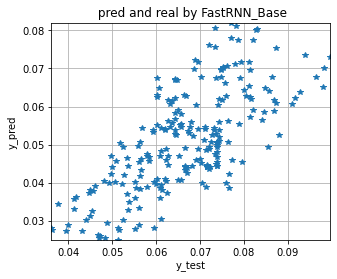

In [236]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_test)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by FastRNN_Base')
plt.show()

## 12.2 FastRNN-HOA

In [176]:
x=sol_opti_HOA.copy()

In [177]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 32
active1 : tanh
alpha1 : -1.2437
beta1 : 0.0
units2 : 4
active2 : tanh
alpha2 : -2.549
beta2 : 3.8847
units3 : 64
active3 : sigmoid
alpha3 : -4.5672
beta3 : 0.0
dense1 : 32
dense2 : 16
drop : 0.0
____________________________________________________________________________________________________


In [178]:
FastRNN_HOA=ceate_fast_rnn(X_train,dict_fast)
FastRNN_HOA.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 32)             3682      
                                                                 
 global_max_pooling1d_10 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_36 (Dense)            (None, 32)                1056      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                          

In [164]:
# fitness(x)

In [165]:
hist_model_FastRNN_HOA=FastRNN_HOA.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
67/67 [==============================] - 2s 9ms/step - loss: 0.0038 - val_loss: 8.1034e-04
Epoch 2/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 9.0254e-05
Epoch 3/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 4.5978e-04
Epoch 4/100
67/67 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 1.3274e-04
Epoch 5/100
67/67 [==============================] - 0s 5ms/step - loss: 9.7114e-04 - val_loss: 1.1577e-04
Epoch 6/100
67/67 [==============================] - 0s 5ms/step - loss: 9.7524e-04 - val_loss: 7.6882e-05
Epoch 7/100
67/67 [==============================] - 0s 5ms/step - loss: 8.9483e-04 - val_loss: 6.1912e-05
Epoch 8/100
67/67 [==============================] - 0s 5ms/step - loss: 9.0960e-04 - val_loss: 1.2192e-04
Epoch 9/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 2.0379e-04
Epoch 10/100
67/67 [==============================] - 0s 

In [237]:
from sklearn import metrics
y_pred=FastRNN_HOA.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_HOA',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)



[['FastRNN_Base', 0.0003, 0.0185, 0.0161, -1.1863, 0.2408], ['FastRNN_HOA', 0.0001, 0.0077, 0.0063, 0.6274, 0.0959]]


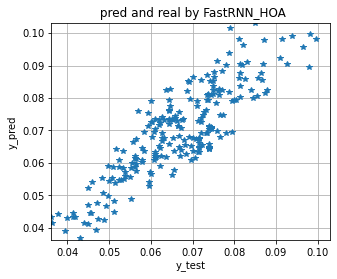

In [238]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_HOA')
plt.show()

## 12.3 FastRNN-SHO

In [93]:
x=best_sol_SHO.copy()

In [94]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 16
active1 : tanh
alpha1 : -0.647
beta1 : 3.0498
units2 : 16
active2 : tanh
alpha2 : -0.4358
beta2 : 2.1911
units3 : 16
active3 : relu
alpha3 : -0.9134
beta3 : 3.2231
dense1 : 2
dense2 : 512
drop : 0.0
____________________________________________________________________________________________________


In [95]:
FastRNN_SHO=ceate_fast_rnn(X_train,dict_fast)
FastRNN_SHO.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 16)             1330      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 2)                 34        
                                                                 
 dense_19 (Dense)            (None, 512)               1536      
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                           

In [228]:
hist_model_FastRNN_SHO=FastRNN_SHO.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
67/67 [==============================] - 2s 8ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 2/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 3.9036e-04
Epoch 3/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 7.1588e-04
Epoch 4/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 4.3579e-04
Epoch 5/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 3.9337e-04
Epoch 6/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 1.3796e-04
Epoch 7/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 3.6581e-04
Epoch 8/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 4.0068e-04
Epoch 9/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 4.9153e-04
Epoch 10/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0

Epoch 79/100
67/67 [==============================] - 0s 6ms/step - loss: 4.9361e-04 - val_loss: 4.3801e-04
Epoch 80/100
67/67 [==============================] - 0s 5ms/step - loss: 5.2022e-04 - val_loss: 7.3206e-04
Epoch 81/100
67/67 [==============================] - 0s 6ms/step - loss: 5.5841e-04 - val_loss: 9.5448e-04
Epoch 82/100
67/67 [==============================] - 0s 5ms/step - loss: 5.5897e-04 - val_loss: 8.8931e-04
Epoch 83/100
67/67 [==============================] - 0s 5ms/step - loss: 5.8516e-04 - val_loss: 5.5455e-04
Epoch 84/100
67/67 [==============================] - 0s 5ms/step - loss: 4.7931e-04 - val_loss: 0.0017
Epoch 85/100
67/67 [==============================] - 0s 5ms/step - loss: 5.1375e-04 - val_loss: 4.8980e-04
Epoch 86/100
67/67 [==============================] - 0s 5ms/step - loss: 6.0032e-04 - val_loss: 6.2843e-04
Epoch 87/100
67/67 [==============================] - 0s 5ms/step - loss: 5.1417e-04 - val_loss: 0.0012
Epoch 88/100
67/67 [================

In [239]:
from sklearn import metrics
y_pred=FastRNN_SHO.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_SHO',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)


[['FastRNN_Base', 0.0003, 0.0185, 0.0161, -1.1863, 0.2408], ['FastRNN_HOA', 0.0001, 0.0077, 0.0063, 0.6274, 0.0959], ['FastRNN_SHO', 0.0006, 0.0248, 0.0237, -2.9047, 0.359]]


In [96]:
# plt.figure(figsize=(5,4))
# plt.plot(y_test,y_pred,'*')
# plt.xlabel('y_test')
# plt.ylabel('y_pred')
# plt.grid(axis='both',)
# plt.xlim([min(y_test),max(y_test)])
# plt.ylim([min(y_pred),max(y_pred)])
# plt.title(' pred and real by FastRNN_SHO')
# plt.show()

## 12.4 GAN_Base

In [94]:
EPOCHS = 1000

In [95]:
data_gen_train, data_gen_test = get_gen_train_test(data_normal)

generator = make_generator_model()
discriminator=make_discriminator_model()

learning_rate=1e-4
generator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)

@tf.function
def train_step(sequences, sequences_end):
  return train_step_def(sequences, sequences_end)

@tf.function
def test_step(sequences, sequences_end):
  return test_step_def(sequences, sequences_end)







Time for epoch 1  Generator Loss: 0.6864625215530396,  Discriminator_loss: 1.3864473104476929
Time for epoch 2  Generator Loss: 0.6902241706848145,  Discriminator_loss: 1.3828706741333008
Time for epoch 3  Generator Loss: 0.694372832775116,  Discriminator_loss: 1.3782790899276733
Time for epoch 4  Generator Loss: 0.6904517412185669,  Discriminator_loss: 1.380753755569458
Time for epoch 5  Generator Loss: 0.6931573152542114,  Discriminator_loss: 1.376969337463379
Time for epoch 6  Generator Loss: 0.6927418112754822,  Discriminator_loss: 1.3796091079711914
Time for epoch 7  Generator Loss: 0.6909828782081604,  Discriminator_loss: 1.3816758394241333
Time for epoch 8  Generator Loss: 0.69256192445755,  Discriminator_loss: 1.3816567659378052
Time for epoch 9  Generator Loss: 0.692551851272583,  Discriminator_loss: 1.3823957443237305
Time for epoch 10  Generator Loss: 0.6943076252937317,  Discriminator_loss: 1.3790305852890015
Time for epoch 11  Generator Loss: 0.6952230334281921,  Discrimin

Time for epoch 88  Generator Loss: 0.6897392868995667,  Discriminator_loss: 1.3839566707611084
Time for epoch 89  Generator Loss: 0.6877083778381348,  Discriminator_loss: 1.389668583869934
Time for epoch 90  Generator Loss: 0.6872389912605286,  Discriminator_loss: 1.3859267234802246
Time for epoch 91  Generator Loss: 0.6897696256637573,  Discriminator_loss: 1.3848620653152466
Time for epoch 92  Generator Loss: 0.6867763996124268,  Discriminator_loss: 1.3866099119186401
Time for epoch 93  Generator Loss: 0.6863055229187012,  Discriminator_loss: 1.386526346206665
Time for epoch 94  Generator Loss: 0.6885124444961548,  Discriminator_loss: 1.3844153881072998
Time for epoch 95  Generator Loss: 0.6881372332572937,  Discriminator_loss: 1.3847426176071167
Time for epoch 96  Generator Loss: 0.687812089920044,  Discriminator_loss: 1.3864902257919312
Time for epoch 97  Generator Loss: 0.6866254806518555,  Discriminator_loss: 1.3874841928482056
Time for epoch 98  Generator Loss: 0.6884150505065918

Time for epoch 174  Generator Loss: 0.6877427697181702,  Discriminator_loss: 1.3851875066757202
Time for epoch 175  Generator Loss: 0.6877691745758057,  Discriminator_loss: 1.385547399520874
Time for epoch 176  Generator Loss: 0.6876382231712341,  Discriminator_loss: 1.3852109909057617
Time for epoch 177  Generator Loss: 0.6877403855323792,  Discriminator_loss: 1.3849291801452637
Time for epoch 178  Generator Loss: 0.6885145902633667,  Discriminator_loss: 1.3858510255813599
Time for epoch 179  Generator Loss: 0.6860459446907043,  Discriminator_loss: 1.3862959146499634
Time for epoch 180  Generator Loss: 0.6878061890602112,  Discriminator_loss: 1.3864150047302246
Time for epoch 181  Generator Loss: 0.6858507394790649,  Discriminator_loss: 1.3882817029953003
Time for epoch 182  Generator Loss: 0.6865542531013489,  Discriminator_loss: 1.3870558738708496
Time for epoch 183  Generator Loss: 0.6864887475967407,  Discriminator_loss: 1.385974407196045
Time for epoch 184  Generator Loss: 0.6867

Time for epoch 260  Generator Loss: 0.687926173210144,  Discriminator_loss: 1.3846049308776855
Time for epoch 261  Generator Loss: 0.6871634125709534,  Discriminator_loss: 1.385897159576416
Time for epoch 262  Generator Loss: 0.6870649456977844,  Discriminator_loss: 1.3864717483520508
Time for epoch 263  Generator Loss: 0.687146008014679,  Discriminator_loss: 1.3856691122055054
Time for epoch 264  Generator Loss: 0.6859817504882812,  Discriminator_loss: 1.3869190216064453
Time for epoch 265  Generator Loss: 0.6871389150619507,  Discriminator_loss: 1.3851344585418701
Time for epoch 266  Generator Loss: 0.6863110065460205,  Discriminator_loss: 1.3860975503921509
Time for epoch 267  Generator Loss: 0.686773955821991,  Discriminator_loss: 1.3870364427566528
Time for epoch 268  Generator Loss: 0.6866651773452759,  Discriminator_loss: 1.3858519792556763
Time for epoch 269  Generator Loss: 0.6870787739753723,  Discriminator_loss: 1.3864222764968872
Time for epoch 270  Generator Loss: 0.687102

Time for epoch 346  Generator Loss: 0.6874337196350098,  Discriminator_loss: 1.38580322265625
Time for epoch 347  Generator Loss: 0.6871261596679688,  Discriminator_loss: 1.386426329612732
Time for epoch 348  Generator Loss: 0.6877346634864807,  Discriminator_loss: 1.384864330291748
Time for epoch 349  Generator Loss: 0.6890967488288879,  Discriminator_loss: 1.3847711086273193
Time for epoch 350  Generator Loss: 0.6883075833320618,  Discriminator_loss: 1.3864127397537231
Time for epoch 351  Generator Loss: 0.6875991225242615,  Discriminator_loss: 1.3856148719787598
Time for epoch 352  Generator Loss: 0.6875515580177307,  Discriminator_loss: 1.3853083848953247
Time for epoch 353  Generator Loss: 0.6881820559501648,  Discriminator_loss: 1.3840410709381104
Time for epoch 354  Generator Loss: 0.6881539225578308,  Discriminator_loss: 1.386957049369812
Time for epoch 355  Generator Loss: 0.6865146160125732,  Discriminator_loss: 1.387441873550415
Time for epoch 356  Generator Loss: 0.68647837

Time for epoch 432  Generator Loss: 0.6862752437591553,  Discriminator_loss: 1.3859626054763794
Time for epoch 433  Generator Loss: 0.6873812079429626,  Discriminator_loss: 1.3854353427886963
Time for epoch 434  Generator Loss: 0.6881584525108337,  Discriminator_loss: 1.3856149911880493
Time for epoch 435  Generator Loss: 0.6866719126701355,  Discriminator_loss: 1.3859024047851562
Time for epoch 436  Generator Loss: 0.6876285672187805,  Discriminator_loss: 1.384851098060608
Time for epoch 437  Generator Loss: 0.6878677010536194,  Discriminator_loss: 1.3850520849227905
Time for epoch 438  Generator Loss: 0.6877676248550415,  Discriminator_loss: 1.3863903284072876
Time for epoch 439  Generator Loss: 0.6885776519775391,  Discriminator_loss: 1.3837997913360596
Time for epoch 440  Generator Loss: 0.6860758066177368,  Discriminator_loss: 1.387229561805725
Time for epoch 441  Generator Loss: 0.685696005821228,  Discriminator_loss: 1.3872730731964111
Time for epoch 442  Generator Loss: 0.68773

Time for epoch 518  Generator Loss: 0.6868310570716858,  Discriminator_loss: 1.3870224952697754
Time for epoch 519  Generator Loss: 0.6871322393417358,  Discriminator_loss: 1.3860536813735962
Time for epoch 520  Generator Loss: 0.6878665089607239,  Discriminator_loss: 1.3854386806488037
Time for epoch 521  Generator Loss: 0.6868539452552795,  Discriminator_loss: 1.3870618343353271
Time for epoch 522  Generator Loss: 0.6867319345474243,  Discriminator_loss: 1.3863378763198853
Time for epoch 523  Generator Loss: 0.6886879801750183,  Discriminator_loss: 1.3841134309768677
Time for epoch 524  Generator Loss: 0.6888225078582764,  Discriminator_loss: 1.3860360383987427
Time for epoch 525  Generator Loss: 0.686367928981781,  Discriminator_loss: 1.3874088525772095
Time for epoch 526  Generator Loss: 0.6864585876464844,  Discriminator_loss: 1.3852113485336304
Time for epoch 527  Generator Loss: 0.6872307658195496,  Discriminator_loss: 1.384922981262207
Time for epoch 528  Generator Loss: 0.6877

Time for epoch 604  Generator Loss: 0.6899749636650085,  Discriminator_loss: 1.384269118309021
Time for epoch 605  Generator Loss: 0.6880137920379639,  Discriminator_loss: 1.3849924802780151
Time for epoch 606  Generator Loss: 0.6884572505950928,  Discriminator_loss: 1.3845505714416504
Time for epoch 607  Generator Loss: 0.6894664168357849,  Discriminator_loss: 1.383360743522644
Time for epoch 608  Generator Loss: 0.6877886056900024,  Discriminator_loss: 1.3844335079193115
Time for epoch 609  Generator Loss: 0.6878749132156372,  Discriminator_loss: 1.3855233192443848
Time for epoch 610  Generator Loss: 0.6886452436447144,  Discriminator_loss: 1.3848685026168823
Time for epoch 611  Generator Loss: 0.6892834305763245,  Discriminator_loss: 1.3843679428100586
Time for epoch 612  Generator Loss: 0.688728392124176,  Discriminator_loss: 1.3832229375839233
Time for epoch 613  Generator Loss: 0.6885929107666016,  Discriminator_loss: 1.3856171369552612
Time for epoch 614  Generator Loss: 0.68937

Time for epoch 690  Generator Loss: 0.6882936954498291,  Discriminator_loss: 1.385048508644104
Time for epoch 691  Generator Loss: 0.6886402368545532,  Discriminator_loss: 1.3855607509613037
Time for epoch 692  Generator Loss: 0.6881327033042908,  Discriminator_loss: 1.3847744464874268
Time for epoch 693  Generator Loss: 0.6887885928153992,  Discriminator_loss: 1.385532021522522
Time for epoch 694  Generator Loss: 0.6897302269935608,  Discriminator_loss: 1.3835299015045166
Time for epoch 695  Generator Loss: 0.6889522671699524,  Discriminator_loss: 1.384089469909668
Time for epoch 696  Generator Loss: 0.6896924376487732,  Discriminator_loss: 1.3832662105560303
Time for epoch 697  Generator Loss: 0.6887487769126892,  Discriminator_loss: 1.3847626447677612
Time for epoch 698  Generator Loss: 0.6891210079193115,  Discriminator_loss: 1.3840949535369873
Time for epoch 699  Generator Loss: 0.6876572370529175,  Discriminator_loss: 1.3856093883514404
Time for epoch 700  Generator Loss: 0.68909

Time for epoch 776  Generator Loss: 0.6901078224182129,  Discriminator_loss: 1.3835914134979248
Time for epoch 777  Generator Loss: 0.6889681220054626,  Discriminator_loss: 1.3838837146759033
Time for epoch 778  Generator Loss: 0.6876598596572876,  Discriminator_loss: 1.383992314338684
Time for epoch 779  Generator Loss: 0.689750075340271,  Discriminator_loss: 1.3847932815551758
Time for epoch 780  Generator Loss: 0.6883895993232727,  Discriminator_loss: 1.385448694229126
Time for epoch 781  Generator Loss: 0.6902843713760376,  Discriminator_loss: 1.3840436935424805
Time for epoch 782  Generator Loss: 0.6889078617095947,  Discriminator_loss: 1.3836238384246826
Time for epoch 783  Generator Loss: 0.687920868396759,  Discriminator_loss: 1.3854690790176392
Time for epoch 784  Generator Loss: 0.6875486969947815,  Discriminator_loss: 1.3855522871017456
Time for epoch 785  Generator Loss: 0.6899368762969971,  Discriminator_loss: 1.3843969106674194
Time for epoch 786  Generator Loss: 0.689644

Time for epoch 862  Generator Loss: 0.6907171010971069,  Discriminator_loss: 1.3821523189544678
Time for epoch 863  Generator Loss: 0.6886789798736572,  Discriminator_loss: 1.384024977684021
Time for epoch 864  Generator Loss: 0.6891686916351318,  Discriminator_loss: 1.3857276439666748
Time for epoch 865  Generator Loss: 0.6886535882949829,  Discriminator_loss: 1.3834325075149536
Time for epoch 866  Generator Loss: 0.6906189918518066,  Discriminator_loss: 1.3822587728500366
Time for epoch 867  Generator Loss: 0.6876601576805115,  Discriminator_loss: 1.3852410316467285
Time for epoch 868  Generator Loss: 0.6887401938438416,  Discriminator_loss: 1.3841149806976318
Time for epoch 869  Generator Loss: 0.690717875957489,  Discriminator_loss: 1.3840622901916504
Time for epoch 870  Generator Loss: 0.6902514100074768,  Discriminator_loss: 1.3843353986740112
Time for epoch 871  Generator Loss: 0.6904432773590088,  Discriminator_loss: 1.385128140449524
Time for epoch 872  Generator Loss: 0.68768

Time for epoch 948  Generator Loss: 0.6907325983047485,  Discriminator_loss: 1.383293628692627
Time for epoch 949  Generator Loss: 0.6895424127578735,  Discriminator_loss: 1.3856778144836426
Time for epoch 950  Generator Loss: 0.6903302669525146,  Discriminator_loss: 1.3849189281463623
Time for epoch 951  Generator Loss: 0.6910660266876221,  Discriminator_loss: 1.3836075067520142
Time for epoch 952  Generator Loss: 0.689189076423645,  Discriminator_loss: 1.386857032775879
Time for epoch 953  Generator Loss: 0.6939723491668701,  Discriminator_loss: 1.3799893856048584
Time for epoch 954  Generator Loss: 0.6920362710952759,  Discriminator_loss: 1.3836054801940918
Time for epoch 955  Generator Loss: 0.6904646754264832,  Discriminator_loss: 1.385064959526062
Time for epoch 956  Generator Loss: 0.692635178565979,  Discriminator_loss: 1.3826433420181274
Time for epoch 957  Generator Loss: 0.6909523010253906,  Discriminator_loss: 1.3844661712646484
Time for epoch 958  Generator Loss: 0.6910709

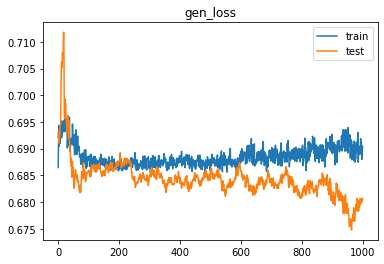

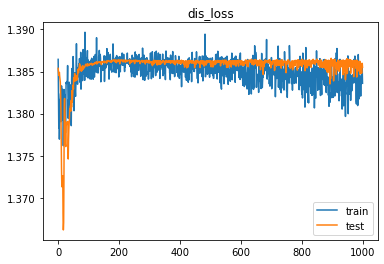

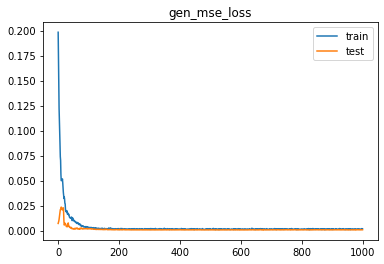

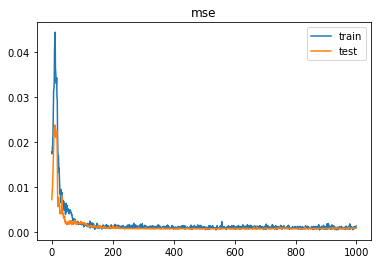

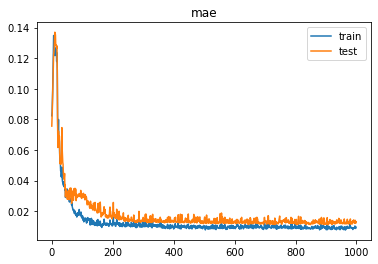

In [96]:
history, history_val = train(data_gen_train, data_gen_test, EPOCHS)
plot_history(history, history_val)


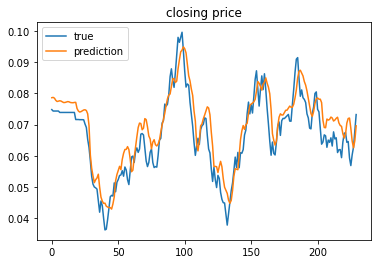

In [241]:
y_pred=[]
y_true=[]
for i in range(len(data_gen_test)):
  sequence, target = data_gen_test[i]
  y_pred .extend(generator.predict(sequence)[...,idx_col_GAN].tolist())
  y_true .extend(target[...,idx_col_GAN].tolist())

plt.figure()
plt.title("closing price")
plt.plot(y_true, label="true")
plt.plot(y_pred, label="prediction")
plt.legend()
plt.show()


In [242]:
from sklearn import metrics
import math

mse=metrics.mean_squared_error(y_true, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_true,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_true,y_pred) 
r2= metrics.r2_score(y_true, y_pred)
#----save to table --------
myTable.append(['GAN_Base',
                 np.round(mse,5),
                 np.round(rmse,5),
                 np.round(mae,5),
                 np.round(r2,5),
                 np.round(mape,5)
                  ])
print(myTable)





[['FastRNN_Base', 0.0003, 0.0185, 0.0161, -1.1863, 0.2408], ['FastRNN_HOA', 0.0001, 0.0077, 0.0063, 0.6274, 0.0959], ['FastRNN_SHO', 0.0006, 0.0248, 0.0237, -2.9047, 0.359], ['GAN_Base', 3e-05, 0.00589, 0.00484, 0.78131, 0.07752]]


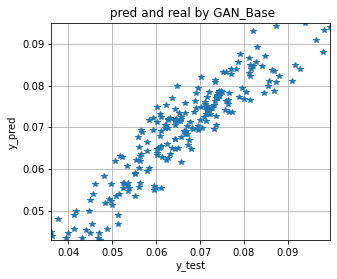

In [243]:
plt.figure(figsize=(5,4))
plt.plot(y_true,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_true),max(y_true)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by GAN_Base')
plt.show()

In [244]:
y_pred_GAN=y_pred

# **13. Final Result**

In [245]:
myTable=np.array(myTable)
print(myTable)

[['FastRNN_Base' '0.0003' '0.0185' '0.0161' '-1.1863' '0.2408']
 ['FastRNN_HOA' '0.0001' '0.0077' '0.0063' '0.6274' '0.0959']
 ['FastRNN_SHO' '0.0006' '0.0248' '0.0237' '-2.9047' '0.359']
 ['GAN_Base' '3e-05' '0.00589' '0.00484' '0.78131' '0.07752']]


In [246]:

data_res=pd.DataFrame(myTable,columns=["algorithm_name","MSE","RMSE","MAE","R2","MAPE"])
data_res=data_res[["algorithm_name","MSE","RMSE","MAE","MAPE","R2"]]
data_res[["MSE","RMSE","MAE","MAPE","R2"]]=data_res[["MSE","RMSE","MAE","MAPE","R2"]].astype(float)
data_res

,algorithm_name,MSE,RMSE,MAE,MAPE,R2
0,FastRNN_Base,0.00030,0.01850,0.01610,0.24080,-1.18630
1,FastRNN_HOA,0.00010,0.00770,0.00630,0.09590,0.62740
2,FastRNN_SHO,0.00060,0.02480,0.02370,0.35900,-2.90470
3,GAN_Base,0.00003,0.00589,0.00484,0.07752,0.78131


In [247]:
data_res.to_excel('out_4.xlsx')

In [248]:
# tbl_as_csv = myTable.get_csv_string().replace('\r','')
# text_file = open("output_all.csv", "w")
# n = text_file.write(tbl_as_csv)
# text_file.close()
# data_res_metric=pd.read_csv("output_all.csv")
# data_res_metric

In [249]:
y_pred_GAN=y_test[0:len(y_test)-len(y_pred)].reshape(-1).tolist()

In [250]:
y_pred_GAN.extend(y_pred)
y_pred_SHO=FastRNN_SHO.predict(X_test,verbose=0)
y_pred_HOA=FastRNN_HOA.predict(X_test,verbose=0)
y_pred_RNN=model_FastRNN_Base.predict(X_test,verbose=0)

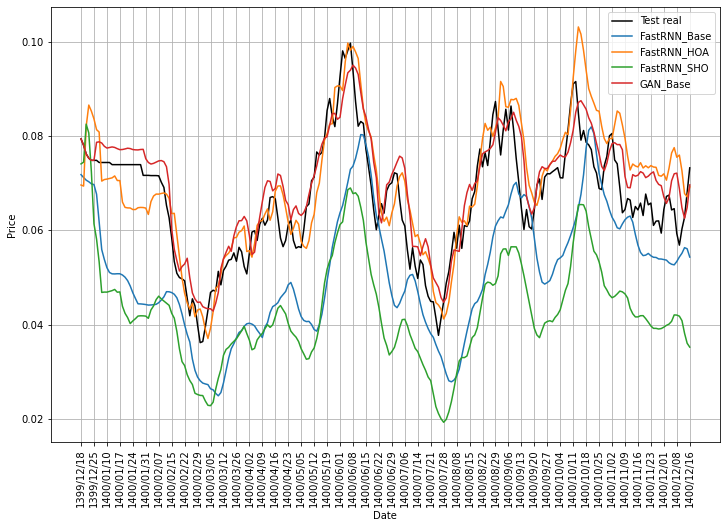

In [251]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'k-',label='Test real')
plt.plot(y_pred_RNN,label='FastRNN_Base')
plt.plot(y_pred_HOA,label='FastRNN_HOA')
plt.plot(y_pred_SHO,label='FastRNN_SHO')
plt.plot(y_pred_GAN,label='GAN_Base')
idx=range(len(y_train),len(y_train)+len(y_test),5)
plt.xticks(range(0,len(y_test),5),data_main['تاریخ شمسی'].values[idx],rotation=90)
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(axis='both')
plt.legend()
plt.savefig('out1_final.png')
plt.show()


In [252]:
import pickle
filename = 'fastrnn_4.pkl'
pickle.dump(model_FastRNN_Base, open(filename, 'wb'))

filename = 'FastRNN_SHO_4.pkl'
pickle.dump(FastRNN_SHO, open(filename, 'wb'))

filename = 'FastRNN_HOA_4.pkl'
pickle.dump(FastRNN_HOA, open(filename, 'wb'))

filename = 'GAN_Base_4.pkl'
pickle.dump(generator, open(filename, 'wb'))